### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

### Loading dataset and reading first five rows

In [3]:
df = pd.read_csv('Admission_Predict.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Checking for shape and dimension

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 400 rows and 9 columns


In [5]:
print(f'The dataset is {df.ndim} dimensions')

The dataset is 2 dimensions


### Checking for info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Checking for missing values

In [7]:
missing_values = pd.DataFrame({'Number of missing values' : df.isnull().sum(),
                              'Percentage of missing values' : (df.isnull().sum() / len(df)) * 100})

missing_values

,Number of missing values,Percentage of missing values
Serial No.,0,0.0
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
Chance of Admit,0,0.0


### Dropping of irrelevant columns

We can drop serial no as it is unique identifer

In [8]:
df.drop(columns = 'Serial No.' , inplace = True)

### Univariate Analysis

In [9]:
num_cols = ['GRE Score','TOEFL Score','CGPA']
cat_cols = ['University Rating','SOP','LOR ','Research']

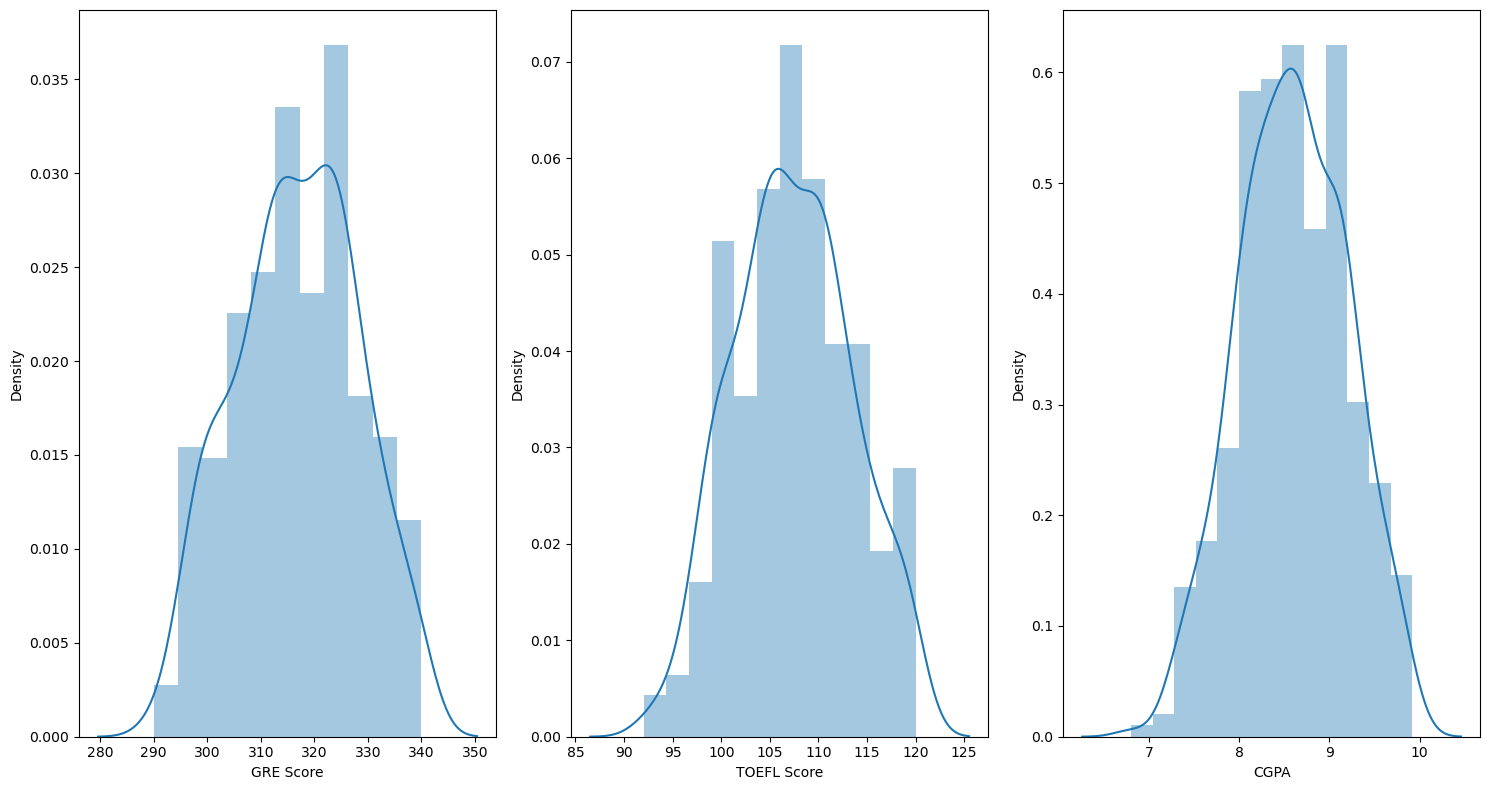

In [10]:
f , ax = plt.subplots(1,3)

for i,v in zip(num_cols , ax.flatten()):
    sns.distplot(df[i] , ax = v)
    
plt.tight_layout()
plt.show()

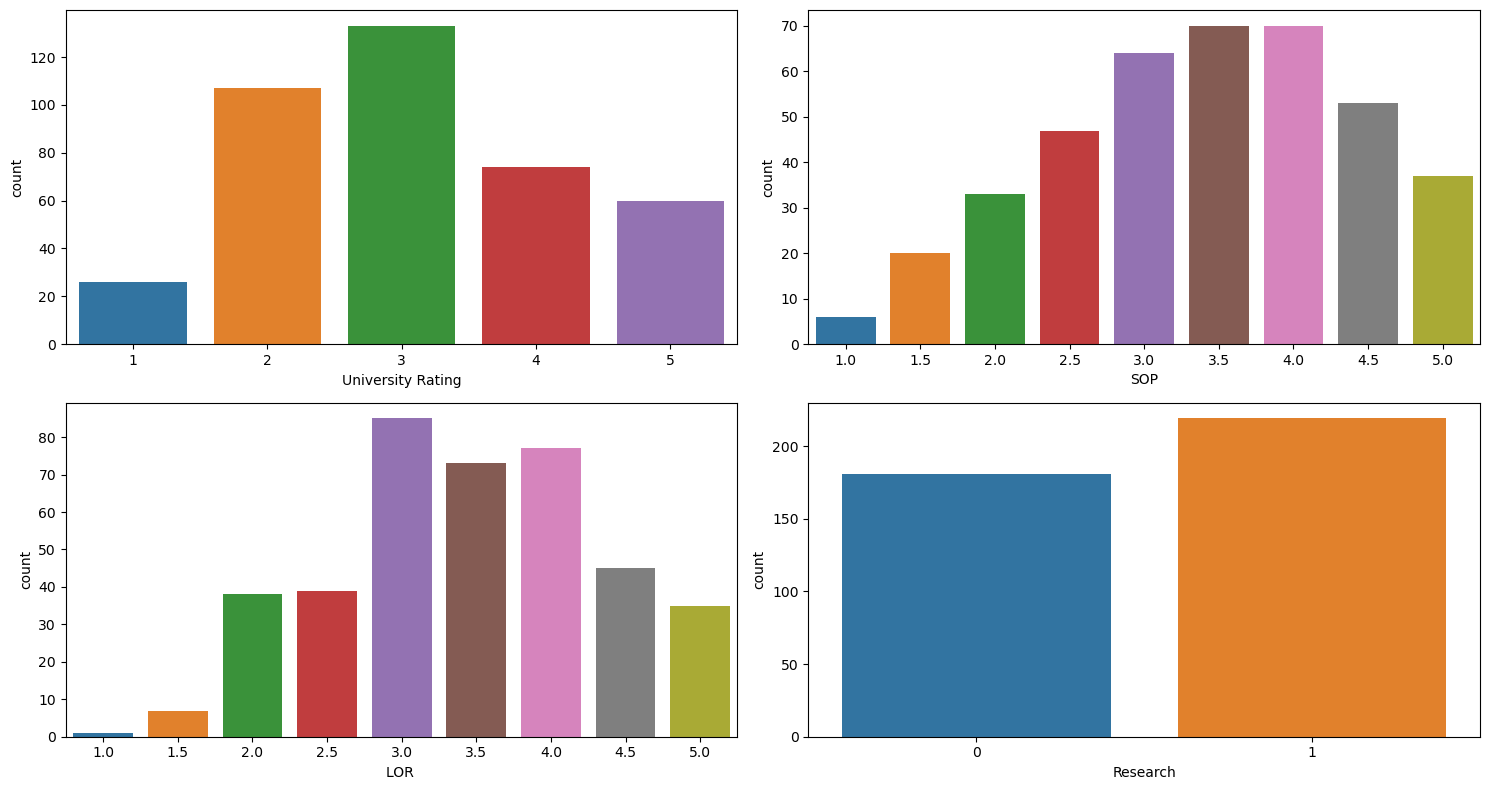

In [11]:
f , ax = plt.subplots(2,2)

for i , v in zip(cat_cols , ax.flatten()):
    sns.countplot(df[i] , ax = v)
    
plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Num vs Num - Scatter Plot

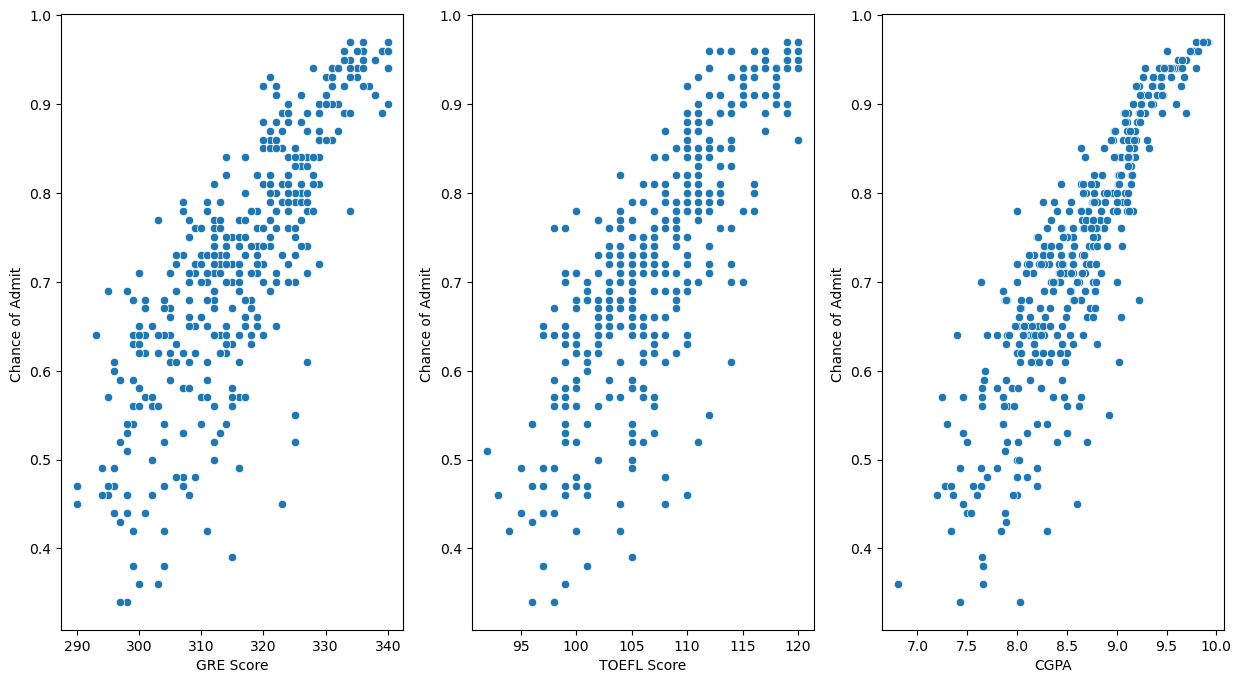

In [12]:
f ,ax = plt.subplots(1,3)

for i,v in zip(num_cols , ax.flatten()):
    sns.scatterplot(x = df[i] , y = df['Chance of Admit '] , ax = v)
    
plt.tight_layout
plt.show()

#### Cat vs Num - Barplot

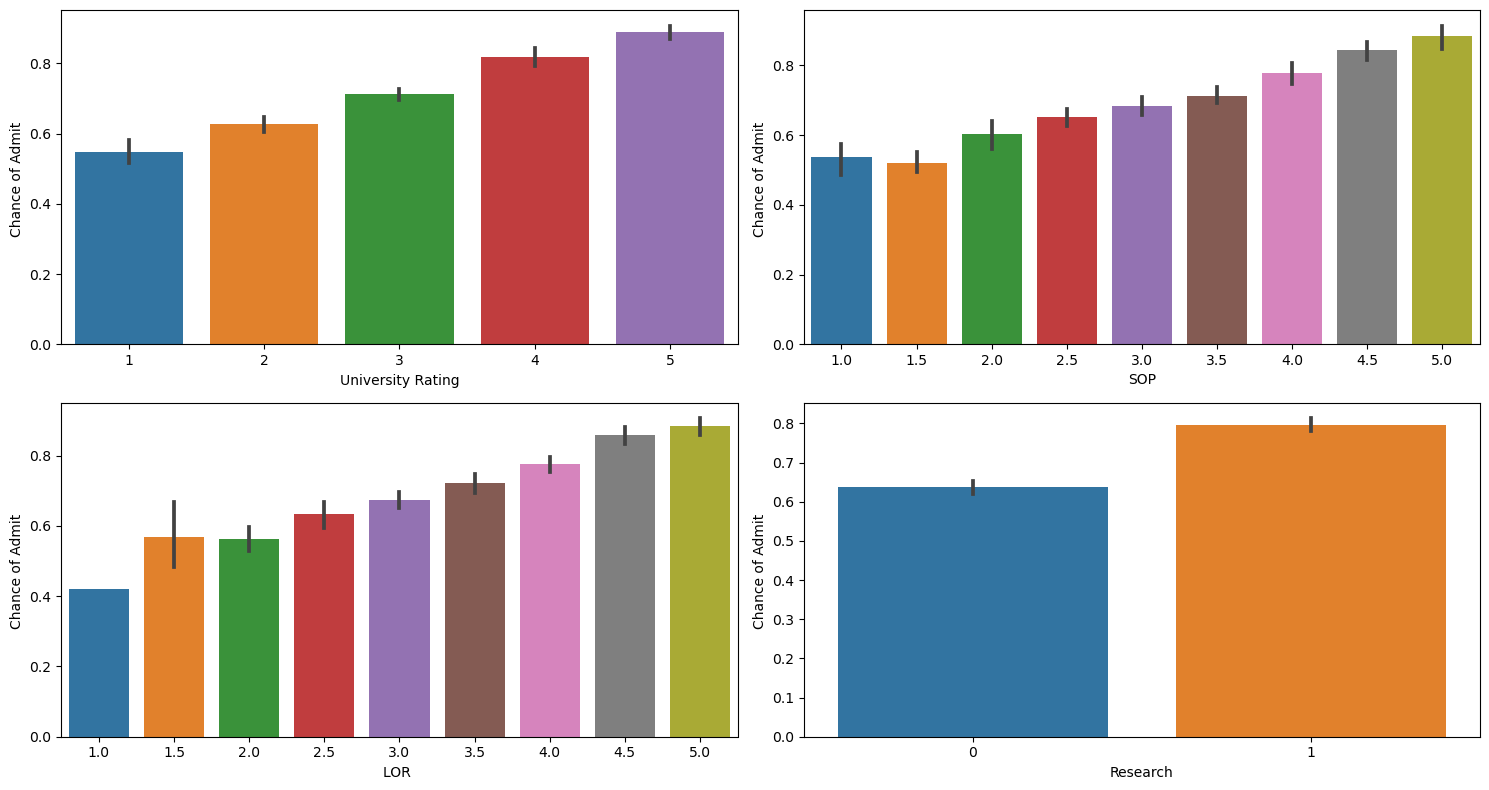

In [13]:
f , ax = plt.subplots(2,2)

for i,v in zip(cat_cols , ax.flatten()):
    sns.barplot(x = df[i] , y = df['Chance of Admit '] , ax = v)
    
plt.tight_layout()
plt.show()

### Multivariate Analysis

<AxesSubplot:>

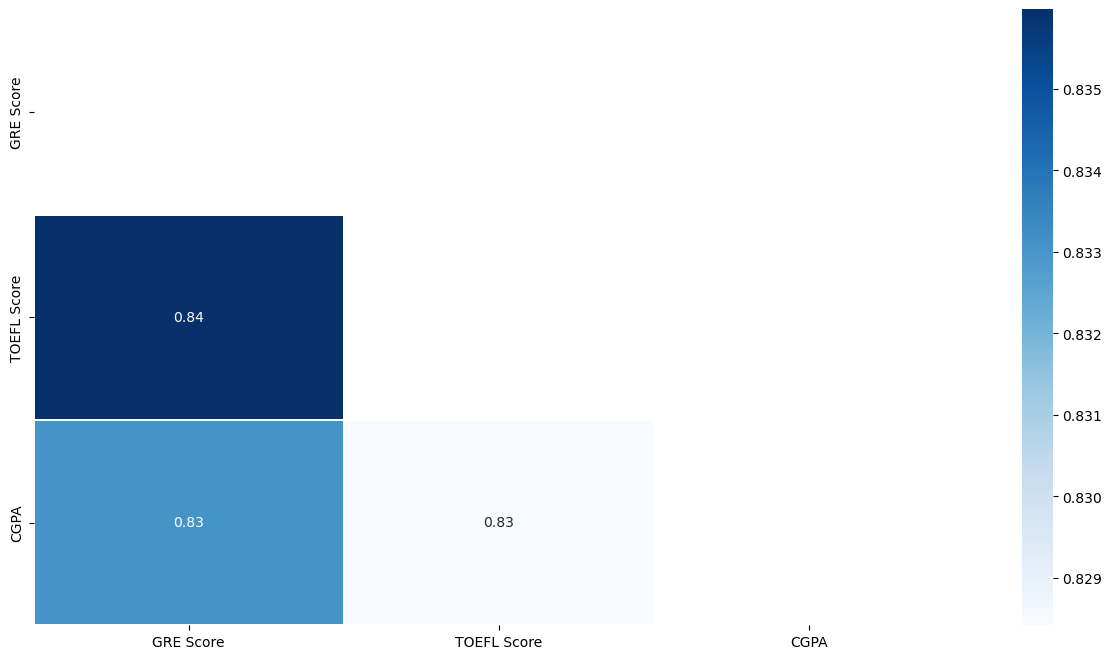

In [14]:
sns.heatmap(df[num_cols].corr() , annot = True , mask = np.triu(df[num_cols].corr()) , cmap = 'Blues',linewidths=0.1)

### Checking and Treating of Outliers

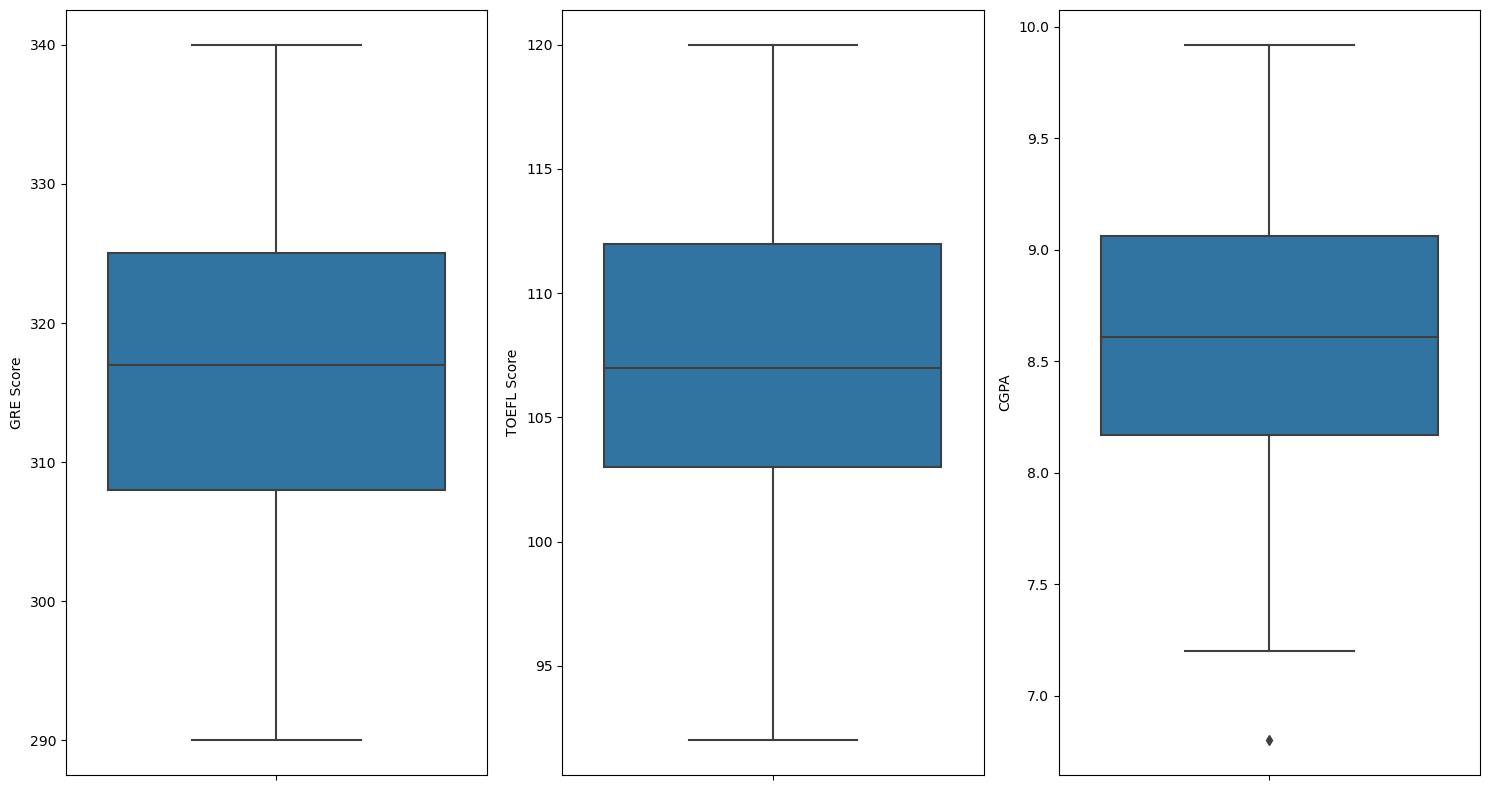

In [15]:
f , ax = plt.subplots(1,3)

for i,v in zip(num_cols , ax.flatten()):
    sns.boxplot(y = df[i] , ax = v)
    
plt.tight_layout()
plt.show()

From above boxplot it is clearly evident that there are no outliers present in the given dataset

### Performing Statistical Test

H0 : There is no significant relationship between dependent and independent variable

Ha : There is significant relationship between dependent and independent variable
    
consider significane level 0.05

In [16]:
statistical_result = pd.DataFrame(columns = ['Columns','Pvalue','Remarks'])

In [17]:
# Num vs Num - Pearsonr test


for i in num_cols:
    stat , pval = stats.pearsonr(df[i] , df['Chance of Admit '])
    
    statistical_result = statistical_result.append({'Columns' : i,
                                                    'Pvalue': '{:f}'.format(pval),
                                                    'Remarks' : 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [18]:
# Num vs Cat - Anova test

for i in cat_cols:
    groups = [df.loc[df[i] == subclass , 'Chance of Admit '] for subclass in df[i].unique()]
    
    stat , pval = stats.f_oneway(*groups)
    
    statistical_result = statistical_result.append({'Columns' : i,
                                                    'Pvalue': '{:f}'.format(pval),
                                                    'Remarks' : 'Reject H0' if pval < 0.05 else 'Failed to reject H0'},
                                                  ignore_index=True)

In [19]:
statistical_result

,Columns,Pvalue,Remarks
0,GRE Score,0.000000,Reject H0
1,TOEFL Score,0.000000,Reject H0
2,CGPA,0.000000,Reject H0
3,University Rating,0.000000,Reject H0
4,SOP,0.000000,Reject H0
5,LOR,0.000000,Reject H0
6,Research,0.000000,Reject H0


From above statistical result it is clearly evident that all the independent variables are significant to dependent variable chance of admit

### Splitting of data into 70% train and 30% test

In [20]:
x = df.drop(columns = 'Chance of Admit ')
y = df['Chance of Admit ']

xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.30 , random_state = 24)

### Building Models

#### Linear Regression using statsmodel

In [21]:
model = sma.OLS(ytrain , sma.add_constant(xtrain)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     172.2
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           4.62e-96
Time:                        19:55:30   Log-Likelihood:                 381.25
No. Observations:                 280   AIC:                            -746.5
Df Residuals:                     272   BIC:                            -717.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.3172      0.149     -8.815      0.000      -1.611      -1.023
GRE Score             0.0018      0.001      2.531      0.012       0.000       0.003
TOEFL Score           0.0038      0.001      2.992      0.003       0.001       0.006
University Rating     0.0055      0.005      1.047      0.296      -0.005       0.016
SOP                  -0.0057      0.006     -0.882      0.379      -0.018       0.007
LOR                   0.0259      0.007      3.869      0.000       0.013       0.039
CGPA                  0.1105      0.014      7.737      0.000       0.082       0.139
Research              0.0245      0.009      2.607      0.010       0.006       0.043
==============================================================================
Omnibus:                       54.280   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.914
Skew:                          -1.052   Prob(JB):                     1.49e-21
Kurtosis:                       4.947   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
pred_train = model.predict(sma.add_constant(xtrain))
pred_test = model.predict(sma.add_constant(xtest))

r2_train = r2_score(ytrain,pred_train)
r2_test = r2_score(ytest,pred_test)
rmse_train = np.sqrt(mean_squared_error(ytrain,pred_train))
rmse_test = np.sqrt(mean_squared_error(ytest,pred_test))

In [23]:
# Creating a dataframe to store values of train and test data

performance_df = pd.DataFrame(columns = ['Model','Train R2','Test R2','Train RMSE','Test RMSE','Remarks'])

# Creating a user defined function that will create a model and will append the values to dataframe

def model_performnace(model , name , xtrain = xtrain , xtest = xtest , ytrain = ytrain , ytest = ytest ):
    
    global performance_df
    
    model = model.fit(xtrain , ytrain)
    
    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    
    r2_train = r2_score(ytrain , pred_train)
    r2_test = r2_score(ytest , pred_test)
    rmse_train = np.sqrt(mean_squared_error(ytrain , pred_train))
    rmse_test = np.sqrt(mean_squared_error(ytest , pred_test))
    
    def remark(train,test):
        if abs(train - test) > 0.1 or train > 0.95:
            return 'Over Fit'
        elif train > 0.81 and test > 0.76:
            return 'Good Fit'
        else :
            return 'Under Fit'
    
    performance_df = performance_df.append({'Model':name ,
                                           'Train R2':r2_train,
                                           'Test R2':r2_test,
                                           'Train RMSE':'{:f}'.format(rmse_train),
                                           'Test RMSE':'{:f}'.format(rmse_test),
                                           'Remarks':remark(r2_train,r2_test)},
                                          ignore_index=True)
    

In [24]:
# Creating a user defined function that will highlight the rows which are good fit

def highlight(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    
    else:
        return color_white

In [25]:
# Appending values of our base model to dataframe

performance_df = performance_df.append({'Model':'Base Model','Train R2':r2_train,'Test R2':r2_test,
                                       'Train RMSE':'{:f}'.format(rmse_train),'Test RMSE':'{:f}'.format(rmse_test),
                                        'Remarks':'Base'},ignore_index=True)

performance_df

,Model,Train R2,Test R2,Train RMSE,Test RMSE,Remarks
0,Base Model,0.815868,0.76753,0.062004,0.066146,Base


In [26]:
# Decision tree

model_performnace(DecisionTreeRegressor() , 'DecisionTRee')

In [27]:
# Random Forest

model_performnace(RandomForestRegressor() , 'RandomForest')

In [28]:
# KNN

model_performnace(KNeighborsRegressor() , 'KNN')

In [29]:
# AdaBoost

model_performnace(AdaBoostRegressor() , 'AdaBoost')

In [30]:
# GradientBoost

model_performnace(GradientBoostingRegressor() , 'GradientBoosting')

In [31]:
# XGBoost

model_performnace(XGBRegressor() , 'XGBoost')

In [32]:
# Catboost

model_performnace(CatBoostRegressor() , 'Catboost')

Learning rate set to 0.033483
0:	learn: 0.1414277	total: 142ms	remaining: 2m 21s
1:	learn: 0.1384456	total: 144ms	remaining: 1m 11s
2:	learn: 0.1355664	total: 147ms	remaining: 48.8s
3:	learn: 0.1329921	total: 150ms	remaining: 37.2s
4:	learn: 0.1301895	total: 153ms	remaining: 30.5s
5:	learn: 0.1273651	total: 156ms	remaining: 25.8s
6:	learn: 0.1247723	total: 158ms	remaining: 22.4s
7:	learn: 0.1222209	total: 160ms	remaining: 19.9s
8:	learn: 0.1197420	total: 162ms	remaining: 17.8s
9:	learn: 0.1172545	total: 163ms	remaining: 16.2s
10:	learn: 0.1151215	total: 165ms	remaining: 14.8s
11:	learn: 0.1129732	total: 167ms	remaining: 13.8s
12:	learn: 0.1108684	total: 169ms	remaining: 12.8s
13:	learn: 0.1086990	total: 171ms	remaining: 12s
14:	learn: 0.1066170	total: 173ms	remaining: 11.3s
15:	learn: 0.1047038	total: 174ms	remaining: 10.7s
16:	learn: 0.1028211	total: 176ms	remaining: 10.2s
17:	learn: 0.1010258	total: 178ms	remaining: 9.73s
18:	learn: 0.0992625	total: 181ms	remaining: 9.33s
19:	learn: 

224:	learn: 0.0443605	total: 370ms	remaining: 1.27s
225:	learn: 0.0442445	total: 371ms	remaining: 1.27s
226:	learn: 0.0441731	total: 372ms	remaining: 1.27s
227:	learn: 0.0441368	total: 373ms	remaining: 1.26s
228:	learn: 0.0441042	total: 374ms	remaining: 1.26s
229:	learn: 0.0439964	total: 375ms	remaining: 1.26s
230:	learn: 0.0439592	total: 376ms	remaining: 1.25s
231:	learn: 0.0439522	total: 377ms	remaining: 1.25s
232:	learn: 0.0438339	total: 378ms	remaining: 1.24s
233:	learn: 0.0437658	total: 379ms	remaining: 1.24s
234:	learn: 0.0437053	total: 380ms	remaining: 1.24s
235:	learn: 0.0436581	total: 381ms	remaining: 1.23s
236:	learn: 0.0435864	total: 382ms	remaining: 1.23s
237:	learn: 0.0435725	total: 383ms	remaining: 1.23s
238:	learn: 0.0435545	total: 384ms	remaining: 1.22s
239:	learn: 0.0435459	total: 385ms	remaining: 1.22s
240:	learn: 0.0434641	total: 386ms	remaining: 1.22s
241:	learn: 0.0433804	total: 387ms	remaining: 1.21s
242:	learn: 0.0433665	total: 388ms	remaining: 1.21s
243:	learn: 

425:	learn: 0.0334054	total: 549ms	remaining: 740ms
426:	learn: 0.0333516	total: 550ms	remaining: 738ms
427:	learn: 0.0332901	total: 551ms	remaining: 737ms
428:	learn: 0.0332494	total: 552ms	remaining: 735ms
429:	learn: 0.0332421	total: 553ms	remaining: 734ms
430:	learn: 0.0331899	total: 554ms	remaining: 732ms
431:	learn: 0.0331293	total: 555ms	remaining: 730ms
432:	learn: 0.0330659	total: 556ms	remaining: 728ms
433:	learn: 0.0330080	total: 557ms	remaining: 727ms
434:	learn: 0.0330028	total: 558ms	remaining: 725ms
435:	learn: 0.0329164	total: 559ms	remaining: 723ms
436:	learn: 0.0328483	total: 560ms	remaining: 721ms
437:	learn: 0.0327715	total: 561ms	remaining: 720ms
438:	learn: 0.0326851	total: 562ms	remaining: 718ms
439:	learn: 0.0326808	total: 563ms	remaining: 717ms
440:	learn: 0.0326785	total: 564ms	remaining: 715ms
441:	learn: 0.0326399	total: 565ms	remaining: 713ms
442:	learn: 0.0326055	total: 566ms	remaining: 712ms
443:	learn: 0.0325384	total: 568ms	remaining: 711ms
444:	learn: 

629:	learn: 0.0253508	total: 728ms	remaining: 427ms
630:	learn: 0.0253158	total: 729ms	remaining: 426ms
631:	learn: 0.0252626	total: 730ms	remaining: 425ms
632:	learn: 0.0252438	total: 731ms	remaining: 424ms
633:	learn: 0.0252286	total: 732ms	remaining: 423ms
634:	learn: 0.0252034	total: 733ms	remaining: 421ms
635:	learn: 0.0251639	total: 734ms	remaining: 420ms
636:	learn: 0.0251209	total: 735ms	remaining: 419ms
637:	learn: 0.0250797	total: 736ms	remaining: 418ms
638:	learn: 0.0250464	total: 737ms	remaining: 417ms
639:	learn: 0.0250119	total: 738ms	remaining: 415ms
640:	learn: 0.0249672	total: 739ms	remaining: 414ms
641:	learn: 0.0249189	total: 741ms	remaining: 413ms
642:	learn: 0.0248924	total: 742ms	remaining: 412ms
643:	learn: 0.0248499	total: 743ms	remaining: 411ms
644:	learn: 0.0248456	total: 744ms	remaining: 410ms
645:	learn: 0.0248134	total: 745ms	remaining: 408ms
646:	learn: 0.0247996	total: 746ms	remaining: 407ms
647:	learn: 0.0247589	total: 748ms	remaining: 406ms
648:	learn: 

825:	learn: 0.0196890	total: 908ms	remaining: 191ms
826:	learn: 0.0196541	total: 910ms	remaining: 190ms
827:	learn: 0.0196356	total: 911ms	remaining: 189ms
828:	learn: 0.0196122	total: 912ms	remaining: 188ms
829:	learn: 0.0196044	total: 913ms	remaining: 187ms
830:	learn: 0.0195802	total: 914ms	remaining: 186ms
831:	learn: 0.0195601	total: 914ms	remaining: 185ms
832:	learn: 0.0195544	total: 915ms	remaining: 184ms
833:	learn: 0.0195114	total: 916ms	remaining: 182ms
834:	learn: 0.0195051	total: 917ms	remaining: 181ms
835:	learn: 0.0194817	total: 918ms	remaining: 180ms
836:	learn: 0.0194550	total: 919ms	remaining: 179ms
837:	learn: 0.0194327	total: 920ms	remaining: 178ms
838:	learn: 0.0193936	total: 921ms	remaining: 177ms
839:	learn: 0.0193365	total: 922ms	remaining: 176ms
840:	learn: 0.0193196	total: 923ms	remaining: 174ms
841:	learn: 0.0192983	total: 924ms	remaining: 173ms
842:	learn: 0.0192611	total: 925ms	remaining: 172ms
843:	learn: 0.0191887	total: 926ms	remaining: 171ms
844:	learn: 

In [33]:
performance_df

,Model,Train R2,Test R2,Train RMSE,Test RMSE,Remarks
0,Base Model,0.815868,0.767530,0.062004,0.066146,Base
1,DecisionTRee,1.000000,0.614393,0.000000,0.085191,Over Fit
2,RandomForest,0.967439,0.737626,0.026074,0.070272,Over Fit
3,KNN,0.811396,0.632535,0.062752,0.083163,Over Fit
4,AdaBoost,0.839607,0.698930,0.057869,0.075276,Over Fit
5,GradientBoosting,0.940036,0.711380,0.035383,0.073703,Over Fit
6,XGBoost,0.999807,0.655497,0.002007,0.080523,Over Fit
7,Catboost,0.987785,0.717429,0.015970,0.072926,Over Fit


From the given dataframe, it is evident that linear regression, being a simple algorithm, outperforms other more complex algorithms. This serves as a great illustration of how complex algorithms can lead to overfitting when dealing with small and straightforward datasets. In such cases, the simplicity and generalization ability of linear regression prove to be advantageous.